# NNDL [HW1 extra]

In [2]:
%load_ext autoreload
%autoreload 2

from char_recognition import *
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
def dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1 - y2)**2)
    
def are_distinct(rs, xs, ys):
    for i in range(len(xs)):
        for j in range(i+1, len(xs)):
            if dist(xs[i], ys[i], xs[j], ys[j]) < rs[i] + rs[j]: return False
    return True

def random_circle_generators(m = None, max_r = 25, max_xy = 200):
    if m is None: m = np.random.randint(3,10)
    rs = np.random.uniform(10, max_r, m)
    xs = np.random.uniform(0, max_xy, m)
    ys = np.random.uniform(0, max_xy, m)

    while not are_distinct(rs, xs, ys):
        plt.show()
        rs = np.random.uniform(0, max_r, m)
        xs = np.random.uniform(0, max_xy, m)
        ys = np.random.uniform(0, max_xy, m)

    return xs , ys , rs

Text(0.5, 1.0, 'random circles')

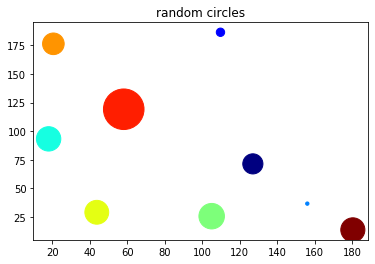

In [4]:
xs , ys, rs = random_circle_generators()
plt.scatter(xs, ys, s=np.pi*rs**2, c=[i for i in range(len(xs))], cmap='jet')
plt.title('random circles')

In [5]:
def make_random_data_from_circles(xs, ys, rs, size):
    m = len(xs)
    # one hot coding
    labels = np.eye(m)
    labels[labels == 0] = -1
    fs = []
    ls = []
    cs = []

    for i in range(m):
        ris = np.random.uniform(0, rs[i], size)
        this = np.random.uniform(0, 2*np.pi, size)
        xi = ris * np.cos(this) + xs[i]
        yi = ris * np.sin(this) + ys[i]
        xi = xi.reshape(size, 1)
        yi = yi.reshape(size, 1)
        # data_i = np.stack((xi, yi, xi*yi,  xi**2, yi**2,yi*xi**2, xi*yi**2, xi==xi), axis=1)
        data_i = np.stack((xi, yi), axis=1)

        fs.append(data_i)

        l_i = np.repeat(labels[i].reshape(1, -1), size, axis=0)
        ls.append(l_i)

        for j in range(size):
            cs.append(i)
        
    fs = np.array(fs).reshape(m*size, -1)
    ls = np.array(ls).reshape(m*size, -1)

    return fs, ls, cs

In [6]:
def pipe(F):
    x = F[:, 0]
    y = F[:, 1]
    return np.stack((x, y, x*x, y*y, x*y, x*y*y, y*x*x, y*y*y, x*x*x, x==x), axis=1)

In [7]:
F, L, cs = make_random_data_from_circles(xs, ys, rs, 20)
F_t = pipe(F)

Text(0.5, 1.0, 'generated date')

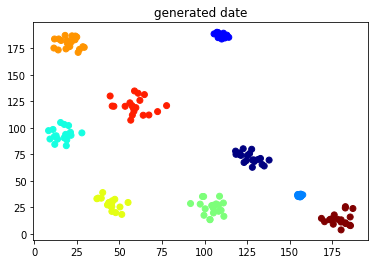

In [8]:
plt.scatter(F[:, 0], F[:, 1], c=cs, cmap='jet')
plt.title('generated date')

In [9]:
layer = Perceptorn(L.shape[1], F_t.shape[1])
optim = Optimizer(layer)
hist = []

100%|██████████| 20000/20000 [02:49<00:00, 117.66it/s]
0.9111111111111111


Text(0, 0.5, 'acc')

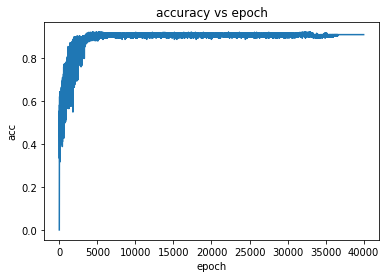

In [18]:
hist = optim.train(F_t, L, verbos_hist= True, hist=hist)
print(optim.test(F_t, L))
plt.plot([i for i in range(len(hist))], hist)
plt.title('accuracy vs epoch')
plt.xlabel('epoch')
plt.ylabel('acc')

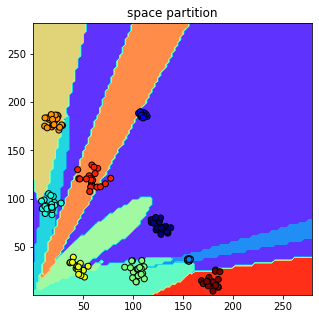

In [19]:
upper_lims = np.max(F, axis= 0)
lower_lims = np.min(F, axis= 0)
Data, X, Y = make_grid_data(lower_lims[0]/100, upper_lims[0]*1.5, lower_lims[1]/100, upper_lims[1]*1.5)

ax = space_partition(Data, X, Y, layer, pipe)
ax.scatter(F[:, 0], F[:, 1], c=cs, cmap='jet', edgecolors='black')